In [155]:

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [156]:
data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [ ]:
data.head()

In [157]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [158]:
Y_train

array([1, 0, 7, ..., 1, 4, 4])

In [159]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


In [160]:

def ReLU(Z):
    return np.maximum(Z, 0)



In [161]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [162]:

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

Create new matrx of zero size (number of examples, classes),So, essentially, for each data point, this function sets a 1 in the column corresponding to its label, effectively performing one-hot encoding. The result is a matrix where each row corresponds to a data point, and each column represents a class, with a 1 indicating the presence of that class for the corresponding data point.

In [163]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

In [164]:


def ReLU_deriv(Z):
    return Z > 0

In [165]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

**get_predictions(A2)**: This function takes the output of the neural network's final layer (A2) and returns the indices of the maximum values along the first axis. Since A2 likely represents the output probabilities of the network's predictions, np.argmax(A2, 0) will return the indices corresponding to the highest probability class for each data point.

**get_accuracy(predictions, Y)**: This function calculates the accuracy of the model's predictions. It compares the predicted labels (predictions) with the true labels (Y) and calculates the proportion of correct predictions. This is achieved by summing up the number of cases where the predicted label matches the true label and dividing it by the total number of data points (Y.size).

**gradient_descent(X, Y, alpha, iterations)**: This function performs gradient descent optimization to train the neural network. It initializes the network parameters (W1, b1, W2, b2), then iterates over a fixed number of iterations, updating the parameters based on the gradients computed during backpropagation. At every 10th iteration, it prints the iteration number and the current accuracy of the model's predictions. Finally, it returns the trained parameters.

In [166]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [167]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 0 1 ... 0 0 0] [1 0 7 ... 1 4 4]
0.07834146341463415
Iteration:  10
[1 3 1 ... 8 2 3] [1 0 7 ... 1 4 4]
0.15865853658536586
Iteration:  20
[1 3 1 ... 2 2 3] [1 0 7 ... 1 4 4]
0.2094390243902439
Iteration:  30
[1 3 1 ... 2 4 3] [1 0 7 ... 1 4 4]
0.29097560975609754
Iteration:  40
[1 0 1 ... 7 4 1] [1 0 7 ... 1 4 4]
0.3665609756097561
Iteration:  50
[1 0 1 ... 1 4 8] [1 0 7 ... 1 4 4]
0.42817073170731706
Iteration:  60
[1 0 1 ... 1 4 8] [1 0 7 ... 1 4 4]
0.47973170731707315
Iteration:  70
[1 0 1 ... 1 4 8] [1 0 7 ... 1 4 4]
0.521
Iteration:  80
[1 0 1 ... 1 4 6] [1 0 7 ... 1 4 4]
0.556219512195122
Iteration:  90
[1 0 1 ... 1 4 6] [1 0 7 ... 1 4 4]
0.5886585365853658
Iteration:  100
[1 0 1 ... 1 4 6] [1 0 7 ... 1 4 4]
0.6151463414634146
Iteration:  110
[1 0 1 ... 1 4 6] [1 0 7 ... 1 4 4]
0.6383170731707317
Iteration:  120
[1 0 1 ... 1 4 6] [1 0 7 ... 1 4 4]
0.6563658536585366
Iteration:  130
[1 0 1 ... 1 4 6] [1 0 7 ... 1 4 4]
0.6719512195121952
Iteration:  140
[1 0 1 ...

In [168]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


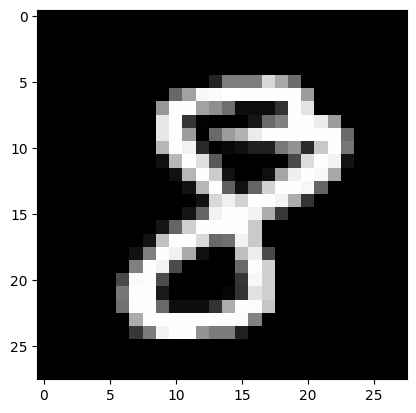

In [169]:
test_prediction(8, W1, b1, W2, b2)